In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc,roc_auc_score


In [2]:
# Example data
y_true = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])
y_scores = np.array([0.1, 0.7, 0.8, 0.3, 0.9, 0.6, 0.2, 0.4, 0.7, 0.5])

In [8]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
df = pd.DataFrame(
    {'fpr'  : fpr, 'tpr' : tpr,'thresholds' : thresholds}
)
print(roc_auc)
df.head()


1.0


,fpr,tpr,thresholds
0,0.0,0.0,inf
1,0.0,0.2,0.9
2,0.0,0.4,0.8
3,0.0,0.8,0.7
4,0.0,1.0,0.6


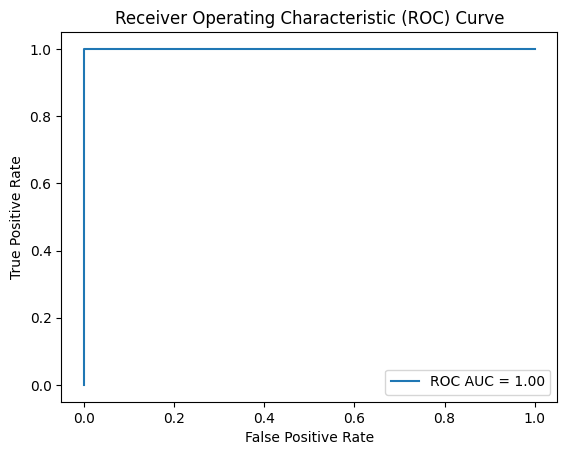

In [10]:
plt.figure()
plt.plot(fpr, tpr,label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The True Positive Rate (TPR) and False Positive Rate (FPR) are key components of ROC curves. TPR, also known as sensitivity or recall, measures the proportion of actual positive cases correctly identified. FPR represents the proportion of actual negative cases incorrectly classified as positive.

TPR = TP/(All positives)  = TP / (TP + FN)   
FPR = FP/(All actual negatives) = FP / (FP + TN)  

(Recall) TPR is the probability that an actual positive will test positive.  
(Specificity) FPR is the probablity that an actual negative will test negative


In [13]:
def cal_tpr_fpr(y_true, y_pred):
    
    true_pos = np.sum((y_true == 1) & (y_pred == 1))
    true_neg = np.sum((y_true == 0) & (y_pred == 0))
    false_pos = np.sum((y_true == 0) & (y_pred == 1))
    false_neg = np.sum((y_true == 1) & (y_pred == 0))
    
    tpr = true_pos / (true_pos + false_neg)
    fpr = false_pos / (false_pos + true_neg)
    return tpr, fpr

y_true = np.random.randint(0,2,size=50)
y_pred=np.random.randint(0,2,size=50)

tpr, fpr = cal_tpr_fpr(y_true, y_pred)
print(f'True Positive Rate: {tpr:.3f}, {fpr:.3f}')
    
    

True Positive Rate: 0.333, 0.621


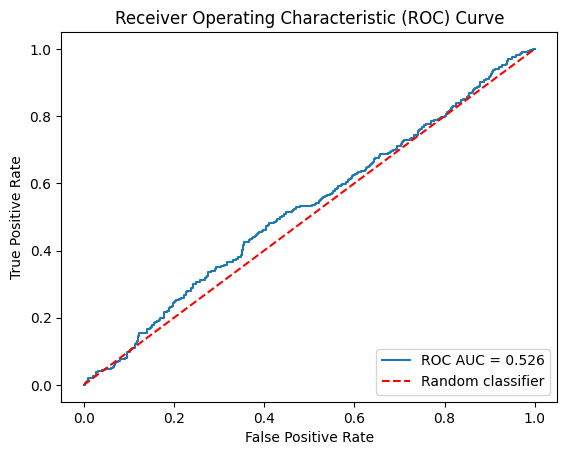

In [18]:
y_true = np.random.randint(0,2,size=1_000)
y_scores=np.random.rand(1_000)

fpr,tpr,thresholds= roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label=f'ROC AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The Area Under the ROC Curve (AUC) provides a single scalar value to measure the overall performance of a classifier. AUC ranges from 0 to 1, with 0.5 representing a random classifier and 1 representing a perfect classifier.

In [21]:

# Generate sample data
# np.random.seed(42)
y_true = np.random.randint(0, 2, 1000)
y_scores = np.random.rand(1000)

# Calculate AUC
auc = roc_auc_score(y_true, y_scores)

print(f"Area Under the Curve (AUC): {auc:.3f}")

# Interpret AUC
if auc < 0.5:
    print("Poor performance (worse than random)")
elif auc < 0.7:
    print("Fair performance")
elif auc < 0.8:
    print("Good performance")
elif auc < 0.9:
    print("Very good performance")
else:
    print("Excellent performance")

Area Under the Curve (AUC): 0.476
Poor performance (worse than random)


Comparing Multiple Classifiers

ROC curves and AUC scores are particularly useful for comparing the performance of multiple classifiers on the same dataset. This allows us to visually and quantitatively assess which model performs better across different classification thresholds.

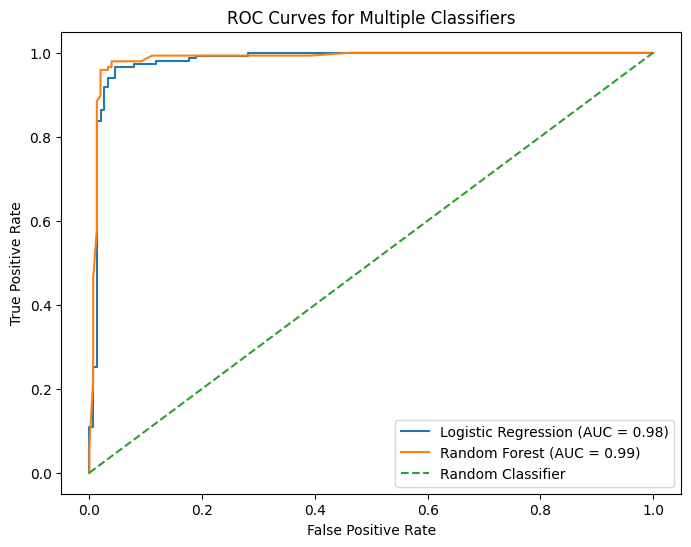

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=25, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train classifiers
lr = LogisticRegression()
rf = RandomForestClassifier()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict probabilities
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Classifiers')
plt.legend()
plt.show()

# Metric Significance and Best Use Cases

| Metric      | Significance                        | Best Use Case                            |
|-------------|-------------------------------------|------------------------------------------|
| **Precision**| Measures correct positive identifications | When false positives are costly          |
| **Recall**   | Identifies actual positives correctly | When false negatives have high costs     |
| **F1-Score** | Balances precision and recall        | For overall model performance            |
| **AUC**      | Measures discrimination ability      | For comparing model performances         |


While the ROC-AUC is widely used, it's less effective with severe imbalances. In such cases, the PR-AUC (Precision-Recall Area Under Curve) emerges as the preferred metric. It's less affected by the large number of true negatives, which can distort results in imbalanced datasets.

# Metric Values and Key Features

| Metric                | Best Value           | Worst Value         | Key Feature                                |
|-----------------------|----------------------|---------------------|--------------------------------------------|
| **F1 Score**           | 1                    | 0                   | Harmonic mean of Precision and Recall      |
| **Weighted Balanced Accuracy** | 1            | 0                   | Adjusts for class weights                  |
| **Precision-Recall Curve** | High area under curve | Low area under curve | Tradeoff between precision and recall      |


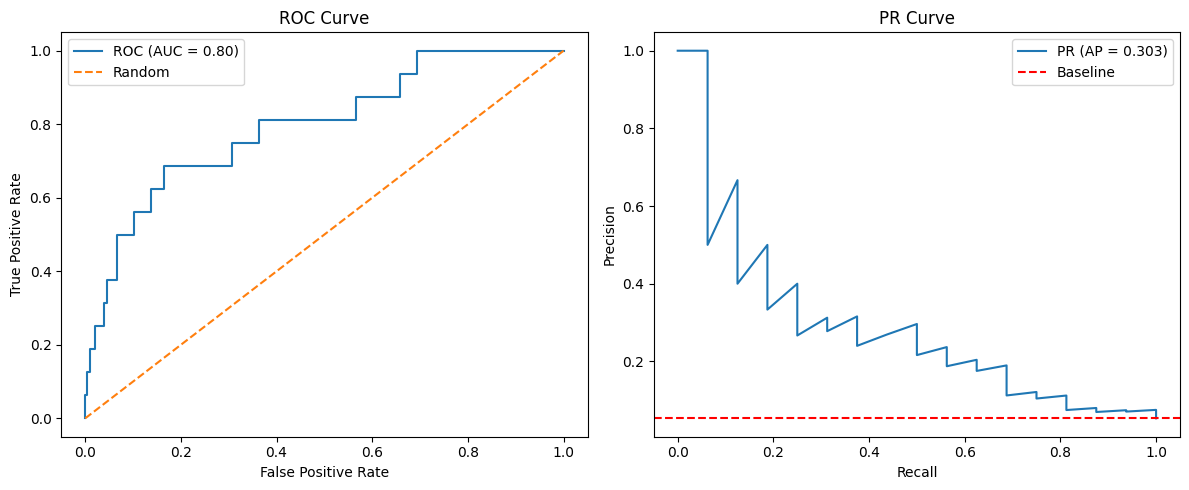

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc

#Generate highly imbalanced data (95% vs 5%)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[.95, .05], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_test)[:, 1]

# 3. Calculate Metrics
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

lr_prec, lr_rec, _ = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

# 4. Plotting
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(lr_rec, lr_prec, label=f'PR (AP = {avg_precision:.3f})')
# Note: In PR curves, the "Random" line is the ratio of positives (y.mean())
plt.axhline(y=y_test.mean(), color='r', linestyle='--', label='Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

Why this matters for Imbalanced Data

When you have a class imbalance (like your 5% minority class), the ROC curve can be deceptively optimistic.

ROC Curve: Uses the False Positive Rate FP/(FP+TN). In imbalanced data, TN (True Negatives) is usually very large, which keeps the FPR small even if the model makes many mistakes on the positive class.

PR Curve: Focuses on the Positive class only. Precision TP/(TP+FP) is much more sensitive to False Positives when the positive class is rare.

Key Observations for your plot:

The Baseline: In an ROC plot, the random baseline is always a 45-degree diagonal. In a PR plot, the baseline is a horizontal line at the point of the positive class prevalence (in your case, ~0.05).

The "Gap": You will likely see a "good-looking" ROC AUC (e.g., 0.80+), while the PR curve might look much worse. The PR curve gives you a more "honest" look at how well the model identifies the rare 5% of cases without flagging too many false alarms.

Cross-Validation for Robust AUC Estimation

To get a more reliable estimate of a model's performance, we can use cross-validation to calculate AUC scores across multiple folds of the data.

In [31]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)

# Initialize classifier and cross-validation
clf = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation
auc_scores = []
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    clf.fit(X_train, y_train)
    y_probs = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_probs)
    auc_scores.append(auc)
    print(f"Fold {fold} AUC: {auc:.3f}")

# Calculate mean and standard deviation of AUC scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
print(f"\nMean AUC: {mean_auc:.3f} (+/- {std_auc:.3f})")

Fold 1 AUC: 0.970
Fold 2 AUC: 0.947
Fold 3 AUC: 0.956
Fold 4 AUC: 0.983
Fold 5 AUC: 0.984

Mean AUC: 0.968 (+/- 0.015)


Optimizing Classification Threshold

The default classification threshold is usually 0.5, but we can optimize this threshold based on the ROC curve to find the best balance between true positive rate and false positive rate.

In [32]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict probabilities
y_probs_result = clf.predict_proba(X_test)
y_probs_result

array([[1.30306771e-02, 9.86969323e-01],
       [6.61501477e-01, 3.38498523e-01],
       [9.83480767e-01, 1.65192333e-02],
       [7.04476398e-01, 2.95523602e-01],
       [9.97391765e-01, 2.60823519e-03],
       [1.24662802e-01, 8.75337198e-01],
       [9.55422530e-01, 4.45774701e-02],
       [9.62366857e-01, 3.76331431e-02],
       [2.42195186e-01, 7.57804814e-01],
       [3.14055338e-02, 9.68594466e-01],
       [9.33685462e-01, 6.63145379e-02],
       [8.73858658e-01, 1.26141342e-01],
       [9.68741989e-01, 3.12580111e-02],
       [9.79444413e-01, 2.05555874e-02],
       [9.25226041e-01, 7.47739589e-02],
       [4.92660945e-01, 5.07339055e-01],
       [6.98731238e-01, 3.01268762e-01],
       [1.77239945e-01, 8.22760055e-01],
       [9.83433731e-01, 1.65662694e-02],
       [3.21144889e-03, 9.96788551e-01],
       [9.84100630e-05, 9.99901590e-01],
       [7.12114301e-02, 9.28788570e-01],
       [3.93218433e-03, 9.96067816e-01],
       [9.43239776e-01, 5.67602244e-02],
       [8.473866

In [33]:
y_probs=y_probs_result[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")

# Apply optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Calculate accuracy with optimal threshold
accuracy_optimal = np.mean(y_pred_optimal == y_test)
print(f"Accuracy with optimal threshold: {accuracy_optimal:.3f}")

# Compare with default threshold
y_pred_default = (y_probs >= 0.5).astype(int)
accuracy_default = np.mean(y_pred_default == y_test)
print(f"Accuracy with default threshold: {accuracy_default:.3f}")

Optimal threshold: 0.712
Accuracy with optimal threshold: 0.933
Accuracy with default threshold: 0.903


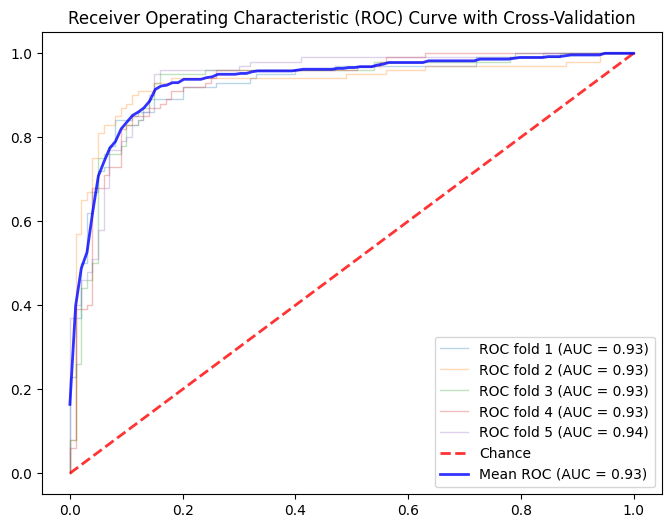

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Generate sample data
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(8, 6))

for i, (train, test) in enumerate(cv.split(X, y)):
    model.fit(X[train], y[train])
    y_pred_proba = model.predict_proba(X[test])[:, 1]
    fpr, tpr, _ = roc_curve(y[test], y_pred_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
ax.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver Operating Characteristic (ROC) Curve with Cross-Validation")
ax.legend(loc="lower right")
plt.show()

Visualizing Decision Boundaries

To better understand how the ROC curve relates to the model's decision boundary, we can visualize the decision boundary alongside the ROC curve for a simple 2D dataset.

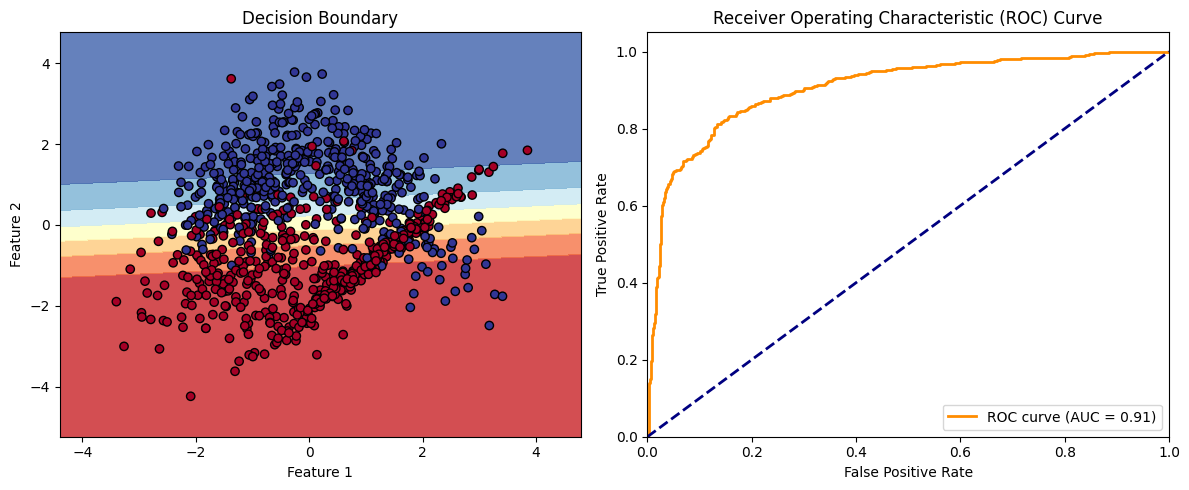

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generate 2D dataset
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, n_informative=2)

# Train logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities for the mesh grid
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Calculate ROC curve and AUC
y_pred_proba = clf.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot decision boundary and data points
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

ROC Curves for Multi-class Classification

While ROC curves are typically used for binary classification, they can be extended to multi-class problems using a one-vs-rest approach.

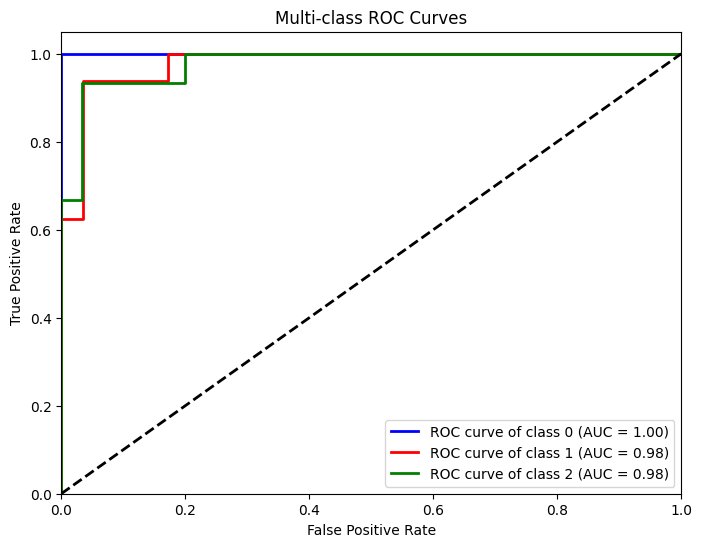

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a multi-class classifier
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)

# Compute ROC curve and ROC area for each class
y_score = clf.predict_proba(X_test)
n_classes = len(np.unique(y))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend(loc="lower right")
plt.show()

Confidence Intervals for AUC

To assess the reliability of our AUC score, we can compute confidence intervals using bootstrapping.

Model AUC: 0.9142
Bootstrap Mean AUC: 0.9140
95% Confidence Interval: [0.8796, 0.9448]


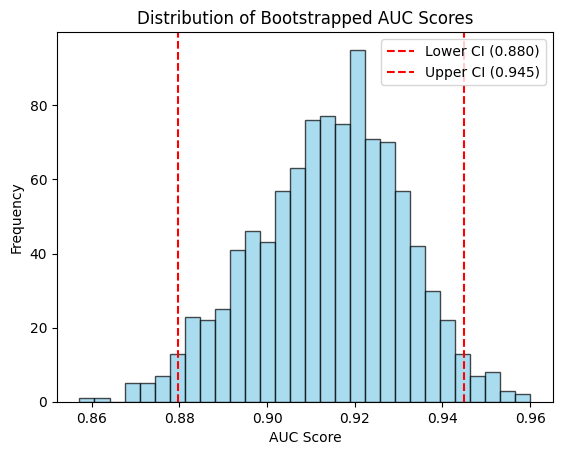

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def bootstrap_auc(y_true, y_pred, n_bootstraps=1000, ci=95):
    """
    Computes the Mean AUC and Confidence Interval using bootstrapping.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Sample indices with replacement
        indices = rng.choice(len(y_pred), size=len(y_pred), replace=True)

        # Ensure bootstrap sample contains both classes
        if len(np.unique(y_true[indices])) < 2:
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)

    # Calculate percentiles for the Confidence Interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile

    mean_auc = np.mean(bootstrapped_scores)
    ci_lower = np.percentile(bootstrapped_scores, lower_percentile)
    ci_upper = np.percentile(bootstrapped_scores, upper_percentile)

    return mean_auc, ci_lower, ci_upper, bootstrapped_scores

# 1. Setup: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train: Simple Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Predict: Get probability scores for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# 4. Evaluate: Calculate AUC and CI
mean_auc, low, high, scores = bootstrap_auc(y_test, y_probs)

# Print Results
print(f"Model AUC: {roc_auc_score(y_test, y_probs):.4f}")
print(f"Bootstrap Mean AUC: {mean_auc:.4f}")
print(f"{95}% Confidence Interval: [{low:.4f}, {high:.4f}]")

# 5. Optional: Visualize the distribution of bootstrapped scores
plt.hist(scores, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(low, color='red', linestyle='--', label=f'Lower CI ({low:.3f})')
plt.axvline(high, color='red', linestyle='--', label=f'Upper CI ({high:.3f})')
plt.title('Distribution of Bootstrapped AUC Scores')
plt.xlabel('AUC Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Above was a solid implementation of the Percentile Bootstrap method. Using bootstrapping for AUC is particularly helpful because the distribution of AUC scores doesn't always follow a clean normal distribution, especially with smaller datasets or imbalanced classes.

Here is a breakdown of why your code works and a few professional refinements to consider.
Why This Approach Works

Non-Parametric: It doesn't assume your AUC scores follow a specific bell curve.

Handles Variability: By sampling with replacement, you are essentially simulating the process of "re-running" your experiment 1,000 times to see how much the result fluctuates.

Robustness: Your check for len(np.unique(y_true[indices])) < 2 is critical; the ROC AUC calculation will crash if a bootstrap sample accidentally contains only one class.

What to look for in the results:

Narrow Interval: Your model is robust; the performance doesn't change much regardless of which specific subset of the population you test on.

Wide Interval: Your model might be overfitted or the test set is too small, meaning the performance is highly dependent on specific data points.

### ROC with thresholds

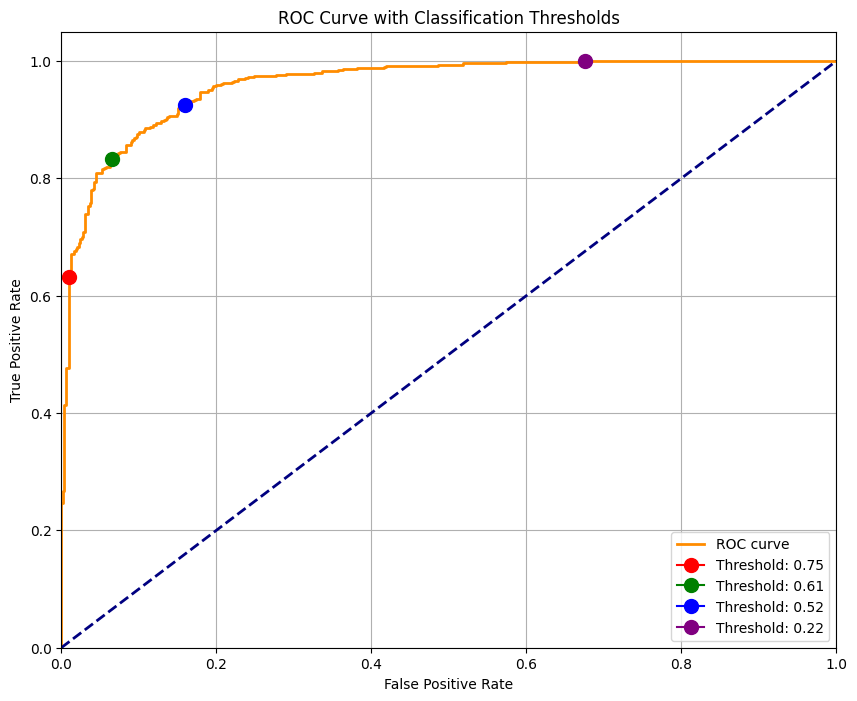

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_thresholds():
    # Generate example data
    np.random.seed(42)
    y_true = np.random.randint(0, 2, 1000)
    y_scores = y_true * np.random.normal(0.8, 0.2, 1000) + (1 - y_true) * np.random.normal(0.3, 0.2, 1000)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Plot ROC curve with threshold points
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Classification Thresholds')
    plt.legend(loc="lower right")

    # Highlight specific threshold points
    threshold_indices = [10, 50, 100, 160]
    colors = ['red', 'green', 'blue', 'purple']
    for i, idx in enumerate(threshold_indices):
        plt.plot(fpr[idx], tpr[idx], color=colors[i], marker='o', markersize=10,
                 label=f'Threshold: {thresholds[idx]:.2f}')

    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_thresholds()

## Optimal cut-off point

Practical example of how to determine an "optimal" cut-off point using Youden’s J statistic (the point where J=Sensitivity+Specificity−1 is maximized).

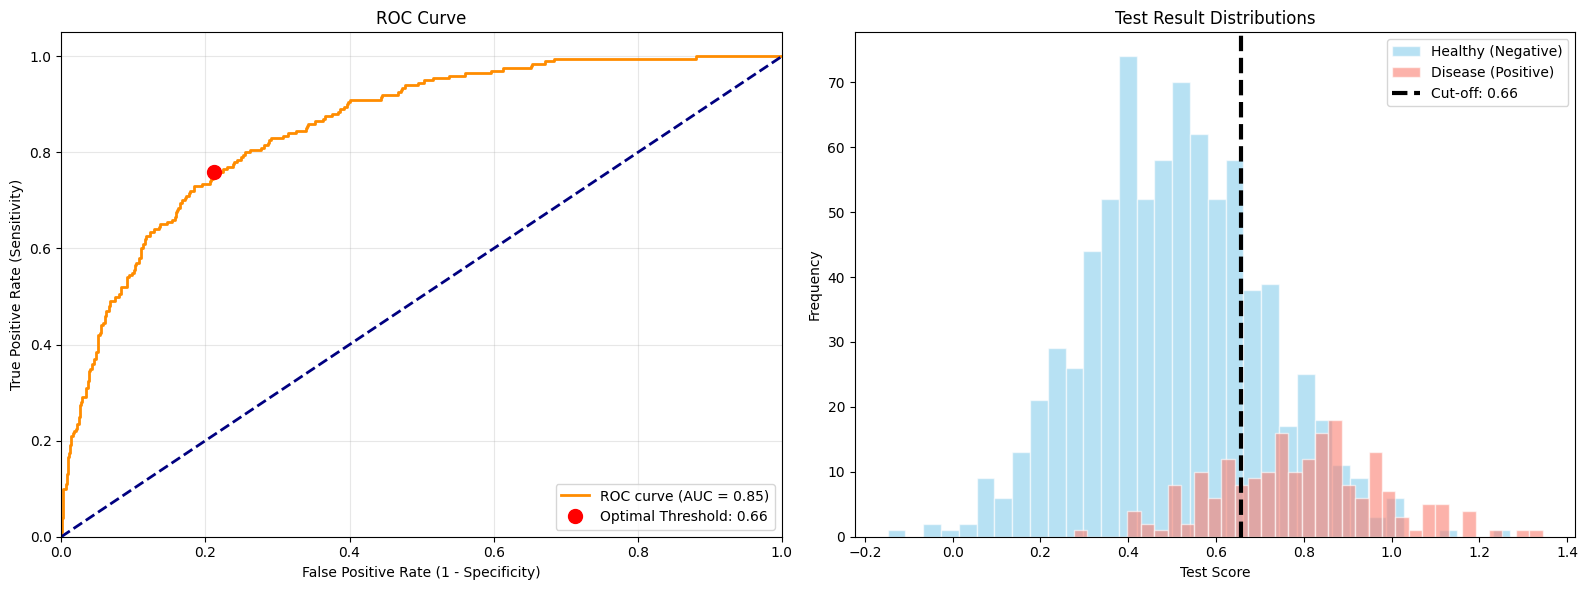

Optimal threshold: 0.6560
Sensitivity (TPR): 0.7600
Specificity (1-FPR): 0.7875


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Simulated data for a medical test
np.random.seed(42)
n_samples = 1000
n_positive = 200

# True condition (1: disease present, 0: disease absent)
y_true = np.zeros(n_samples)
y_true[:n_positive] = 1

# Test results (higher values = higher likelihood of disease)
test_results = np.random.normal(0.5, 0.2, n_samples)
test_results[y_true == 1] += 0.3  # Shift positive cases higher

# 2. Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_true, test_results)
roc_auc = auc(fpr, tpr)

# Find optimal threshold using Youden’s J statistic: J = TPR - FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 3. Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: ROC Curve ---
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=10,
         label=f'Optimal Threshold: {optimal_threshold:.2f}')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate (1 - Specificity)')
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# --- Plot 2: Histogram of Distributions ---
ax2.hist(test_results[y_true == 0], bins=35, alpha=0.6, color='skyblue',
         label='Healthy (Negative)', edgecolor='white')
ax2.hist(test_results[y_true == 1], bins=35, alpha=0.6, color='salmon',
         label='Disease (Positive)', edgecolor='white')
ax2.axvline(optimal_threshold, color='black', linestyle='--', lw=3,
            label=f'Cut-off: {optimal_threshold:.2f}')
ax2.set_title('Test Result Distributions')
ax2.set_xlabel('Test Score')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

# Print Statistics
print(f"Optimal threshold: {optimal_threshold:.4f}")
print(f"Sensitivity (TPR): {tpr[optimal_idx]:.4f}")
print(f"Specificity (1-FPR): {1 - fpr[optimal_idx]:.4f}")

# conclusion

Why this view is important:

This histogram shows the "overlap" zone. The AUC essentially measures how much these two distributions are separated; if they didn't overlap at all, your AUC would be a perfect 1.0.

The Overlap Zone: The area where the blue and red bars overlap is where the model makes mistakes. If those distributions were completely separate, your ROC curve would go straight to the top-left corner (AUC = 1.0).

Sensitivity vs. Specificity: Moving the black dashed line to the left increases Sensitivity (you catch more sick people) but lowers Specificity (you get more false alarms). Moving it to the right does the opposite.

Youden's J: Your calculation for the "Optimal Threshold" is mathematically finding the point where the difference between these two distributions is at its maximum.

Would you like to see how to calculate Precision and Recall at this specific threshold to see how the class imbalance (200 vs 800) affects the results?

To assess how the class imbalance (200 disease cases vs. 800 healthy cases) impacts your test's reliability, we look at Precision (Positive Predictive Value) and Recall (Sensitivity).

In medical screening, if a disease is rare, even a high-performing test can produce many false positives. The code below calculates these metrics at your optimal threshold and adds a third plot: the Precision-Recall Curve.

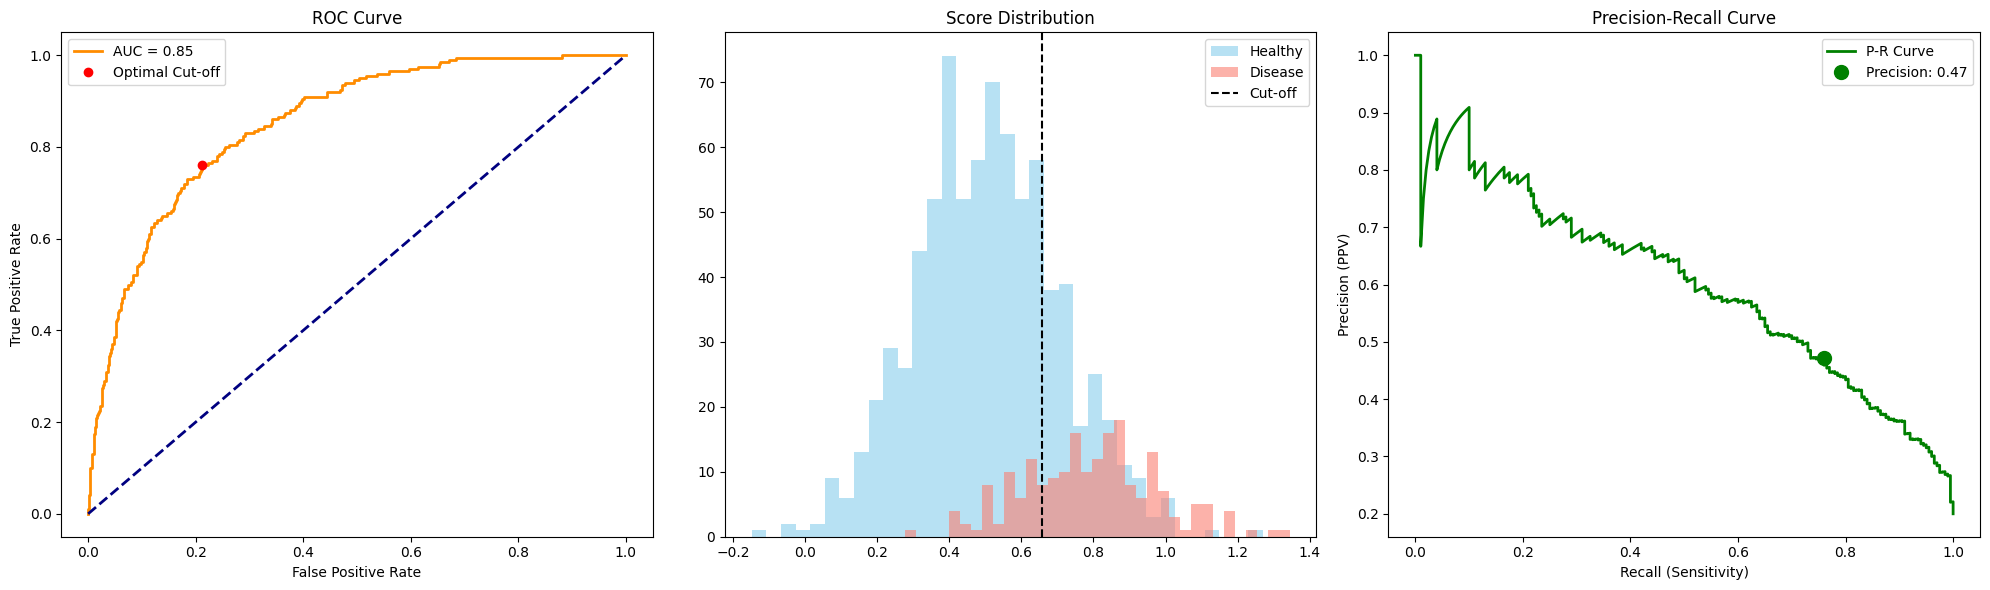

--- Metrics at Threshold 0.656 ---
Recall (Sensitivity): 0.760
Precision (Positive Predictive Value): 0.472


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, recall_score

# 1. Simulated data (re-using your logic)
np.random.seed(42)
n_samples = 1000
n_positive = 200
y_true = np.zeros(n_samples)
y_true[:n_positive] = 1
test_results = np.random.normal(0.5, 0.2, n_samples)
test_results[y_true == 1] += 0.3

# 2. Calculate ROC and Optimal Threshold
fpr, tpr, thresholds = roc_curve(y_true, test_results)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 3. Calculate Precision and Recall at that threshold
# Convert continuous scores to binary 0/1 based on the threshold
y_pred_binary = (test_results >= optimal_threshold).astype(int)

precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)

# 4. Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# --- Plot 1: ROC Curve ---
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc(fpr, tpr):.2f}')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', label='Optimal Cut-off')
ax1.set_title('ROC Curve')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

# --- Plot 2: Distribution Histogram ---
ax2.hist(test_results[y_true == 0], bins=35, alpha=0.6, color='skyblue', label='Healthy')
ax2.hist(test_results[y_true == 1], bins=35, alpha=0.6, color='salmon', label='Disease')
ax2.axvline(optimal_threshold, color='black', linestyle='--', label='Cut-off')
ax2.set_title('Score Distribution')
ax2.legend()

# --- Plot 3: Precision-Recall Curve ---
precisions, recalls, _ = precision_recall_curve(y_true, test_results)
ax3.plot(recalls, precisions, color='green', lw=2, label='P-R Curve')
ax3.plot(recall, precision, 'go', markersize=10, label=f'Precision: {precision:.2f}')
ax3.set_title('Precision-Recall Curve')
ax3.set_xlabel('Recall (Sensitivity)')
ax3.set_ylabel('Precision (PPV)')
ax3.legend()

plt.tight_layout()
plt.show()

print(f"--- Metrics at Threshold {optimal_threshold:.3f} ---")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"Precision (Positive Predictive Value): {precision:.3f}")

Understanding the Trade-off

Precision (PPV): "If the test says I'm sick, what is the actual probability that I have the disease?" In your case, a precision of ~0.50 would mean that half of the people flagged as "positive" are actually healthy.

Recall (Sensitivity): "If I am sick, what is the probability the test will find it?"

The Impact of Imbalance: Notice that while your AUC might look high (e.g., 0.85), the Precision-Recall Curve is often much more "sobering." If you decrease the number of positive cases to 10 (1% prevalence), the AUC would stay roughly the same, but your Precision would plummet because the number of False Positives would overwhelm the few True Positives.

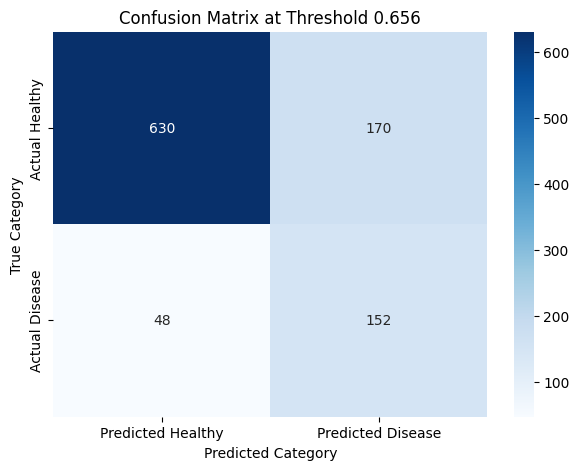

True Negatives (Correctly identified as healthy): 630
False Positives (Healthy people flagged as sick): 170
False Negatives (Sick people missed): 48
True Positives (Sick people correctly identified): 152


In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Generate the Confusion Matrix based on our optimal threshold
# y_pred_binary was calculated as (test_results >= optimal_threshold)
cm = confusion_matrix(y_true, y_pred_binary)

# 2. Plotting
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Healthy', 'Predicted Disease'],
            yticklabels=['Actual Healthy', 'Actual Disease'])

plt.title(f'Confusion Matrix at Threshold {optimal_threshold:.3f}')
plt.ylabel('True Category')
plt.xlabel('Predicted Category')
plt.show()

# 3. Breaking down the counts
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (Correctly identified as healthy): {tn}")
print(f"False Positives (Healthy people flagged as sick): {fp}")
print(f"False Negatives (Sick people missed): {fn}")
print(f"True Positives (Sick people correctly identified): {tp}")

Conclusion
Those numbers make the trade-off very clear. Out of 200 sick people, you caught 152 but missed 48. Meanwhile, you gave 170 healthy people a "false alarm."

In many medical scenarios, a 24% miss rate (False Negatives) is considered too high. If we want to be more "aggressive" in catching the disease, we need to move the threshold.

Lets see what happens when out threshold is now .95

In [50]:
# 1. Find a threshold that achieves roughly 95% Sensitivity (Recall)
target_sensitivity = 0.95
# Find the index where TPR is closest to 0.95
high_sens_idx = np.argmin(np.abs(tpr - target_sensitivity))
high_sens_threshold = thresholds[high_sens_idx]

# 2. Predict using the new high-sensitivity threshold
y_pred_high_sens = (test_results >= high_sens_threshold).astype(int)
cm_high_sens = confusion_matrix(y_true, y_pred_high_sens)
tn2, fp2, fn2, tp2 = cm_high_sens.ravel()

# 3. Print the Comparison
print(f"{'Metric':<20} | {'Balanced (0.656)':<18} | {'High Sens ({:.3f})'.format(high_sens_threshold):<18}")
print("-" * 65)
print(f"{'True Positives':<20} | {tp:<18} | {tp2:<18}")
print(f"{'False Negatives':<20} | {fn:<18} | {fn2:<18}")
print(f"{'False Positives':<20} | {fp:<18} | {fp2:<18}")
print(f"{'Precision (PPV)':<20} | {precision:<18} | {tp2/(tp2+fp2):<18}")

Metric               | Balanced (0.656)   | High Sens (0.504) 
-----------------------------------------------------------------
True Positives       | 152                | 190               
False Negatives      | 48                 | 10                
False Positives      | 170                | 403               
Precision (PPV)      | 0.4720496894409938 | 0.32040472175379425


What happens to the Data now?

When you shift to a 95% Sensitivity threshold:

False Negatives drop significantly: You might only miss 10 people instead of 48.

False Positives skyrocket: Your "False Alarm" count might jump from 170 to 400 or more.

Precision drops: Because you are "casting a wider net," your Positive Predictive Value will likely fall into the 20–30% range.

Which one should you choose?

Screening Test (e.g., Mammogram): Choose High Sensitivity. You want to catch everyone who might be sick and then do a more specific follow-up test.

Diagnostic/Confirmation Test (e.g., Biopsy): Choose High Precision. You don't want to start an invasive treatment like chemotherapy unless you are nearly 100% certain.

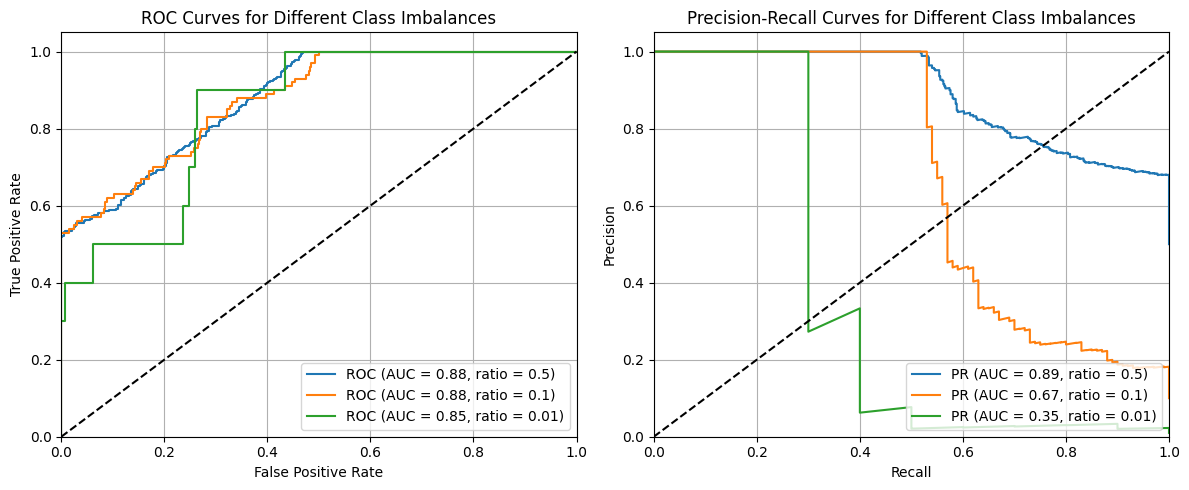

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Simulate data with different class imbalances
np.random.seed(42)
n_samples = 1000

def generate_data(pos_ratio):
    n_positive = int(n_samples * pos_ratio)
    y_true = np.zeros(n_samples)
    y_true[:n_positive] = 1
    y_scores = np.random.random(n_samples)
    y_scores[y_true == 1] += 0.5
    y_scores = np.clip(y_scores, 0, 1)
    return y_true, y_scores

ratios = [0.5, 0.1, 0.01]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ratio in ratios:
    y_true, y_scores = generate_data(ratio)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f}, ratio = {ratio})')

    # PR curve
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    axes[1].plot(recall, precision, label=f'PR (AUC = {pr_auc:.2f}, ratio = {ratio})')

for ax in axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(loc="lower right")
    ax.grid(True)

axes[0].set_title('ROC Curves for Different Class Imbalances')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')

axes[1].set_title('Precision-Recall Curves for Different Class Imbalances')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')

plt.tight_layout()
plt.show()